# Ultra-long bridge design lives
A net-present value short analysis. We'll compare the net-present value of a 100-year, 200-year and 300-year design life bridge.

First, some assumptions:
- A 100-year bridge and a 300-year bridge deliver the same annual benefit.
- Standard discount rates between 2% and 4%.

This analysis is deliberately narrow. It assumes constant annual benefit, no replacement costs, and typical infrastructure discount rates.

It doesn't account for:
- Avoided replacement disruption and construction risk
- Embodied carbon from multiple replacement cycles (though this might be an argument against ultra-long design lives, more on this soon)
- Social discount rates (which are often much lower)
- The asymmetry of error costs
- Future construction capability uncertainty

Now, the analysis.

If a bridge delivers a constant annual benefit $B$, the present value of those benefits over $N$ years, with a discounting rate $r$ is:

$$PV = B \cdot \frac{1 - (1+r)^{-N}}{r}$$

In [48]:
def present_value(B, r, N):
    return B * (1 - (1 + r) ** -N) / r

Now, for the sake of this analysis, we need to make some assumptions about _how much value a bridge provides to the community_. Obviously this will vary greatly, but let's pick $100,000 for simplicity's sake. The conclusions will remain unchanged.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pv_values(rates):

    highlight_years = [100, 200, 300]
    years = np.arange(0, 301, 5)

    B = 100e3

    fig, ax = plt.subplots()

    for i, r in enumerate(rates):
        pv_ratio_values = []

        pv_100 = present_value(B, r, 100)
        for year in years:
            pv = present_value(B, r, year)
            pv_ratio_values.append(pv / pv_100)

            if year in highlight_years:
                ax.scatter(year, pv / pv_100, color=f"C{i}", zorder=5 )
        
        ax.plot(years, np.array(pv_ratio_values), label=f"r = {r:.0%}", color=f"C{i}")

    ax.set_xlabel("Year")
    ax.set_ylabel("Present Value Ratio")
    fig.suptitle("Present value of a bridge of various design lives")
    ax.set_title(f"Normalised to the 100-year value, for various discount rates")
    ax.title.set_fontsize(10)

    current_ticks = ax.get_yticks()
    new_ticks = np.arange(1, 1.21, 0.05)
    ax.set_yticks(np.union1d(current_ticks, new_ticks))

    ax.axhline(1, color="grey", linestyle="--", linewidth=0.5)
    ax.axhline(1.05, color="grey", linestyle="--", linewidth=0.5)
    ax.axhline(1.10, color="grey", linestyle="--", linewidth=0.5)
    ax.axhline(1.15, color="grey", linestyle="--", linewidth=0.5)

    ax.set_ylim(0, 1.2)
    ax.set_xlim(0, 320)
    ax.legend()

    ax.set_facecolor("lightgray")

    plt.savefig("npv-bridges.png", dpi=600)
    plt.show()

And lastly, let's pick a range of discounting values for comparison. We'll say from 2-4% as recommended by this [KPMG study](https://assets.kpmg.com/content/dam/kpmgsites/au/pdf/2021/infrastructure-project-investment-discount-rate.pdf).

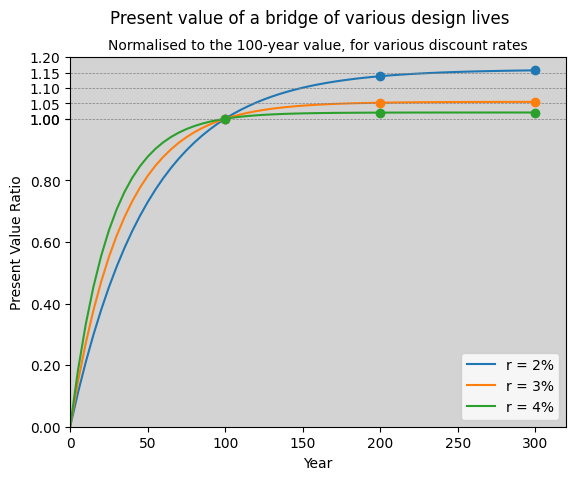

In [50]:
plot_pv_values([0.02, 0.03, 0.04])